Emma Klemets, Nov 2022   
To investigate if we have aligned the old and new data properly.   
A work in progress

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import sys, os
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter

sys.path.insert(1, '../PrettyPlotTools/')
import ParticlePlottingFunctions as ppf
import seaborn as sns

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

file_22 = "data_export/map_referencedMSR_fall2022_together_interp50.txt"
data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

file_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp50.txt"
data_19 = pd.read_csv(file_19, comment='#', sep='\t', names=colNames)

In [18]:
cut_22 = "data_export/map_referencedMSR_fall2022_together_CUT_interp50.txt"
dataCut_22 = pd.read_csv(cut_22, comment='#', sep='\t', names=colNames)

#the data in this file for the B field is 
cut_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp_CUT_interp50.txt"
dataCut_19 = pd.read_csv(cut_19, comment='#', sep='\t', names=colNames)

In [19]:
mins_19 = np.min(dataCut_19)
max_19 = np.max(dataCut_19)

mins_22 = np.min(dataCut_22)
max_22 = np.max(dataCut_22)

print("2019 limits:")
print(mins_19,'\n', max_19)
print("2022 limits:")
print(mins_22, '\n',max_22)

2019 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x   -103.579643
B_y    -79.578744
B_z   -256.526638
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x     -5.617606
B_y    -32.184553
B_z   -156.833015
dtype: float64
2022 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x    -94.285496
B_y    -94.418055
B_z   -263.919420
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x      5.140000
B_y    -28.791676
B_z   -160.995889
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [128]:
#loads all the file I have in this folder as STLs
shiftPath = '../MagMapping-export_TH_2019/data_export/shifts'
shiftfile_array = os.listdir(shiftPath)[:-1]
# print(shiftfile_array)

comparisonshifts = []
comparisonResults = []

for shiftfile in shiftfile_array:
    # print(shiftfile)
    filedata_2019 = f"{shiftPath}/{shiftfile}"
    shift = np.array(filedata_2019.split("[")[1].split("]")[0].split(",")).astype(float)
    # print(shift)    
    
    dataCut_19 = pd.read_csv(filedata_2019, comment='#', sep='\t', names=colNames)
    
    # list(dataCut_19.columns)

    df_compare = dataCut_19.join(dataCut_22, rsuffix='_22', how='outer')

    df_compare = df_compare.where((df_compare['x']==df_compare['x_22']) & 
                                          (df_compare['y']==df_compare['y_22']) &
                                          (df_compare['z']==df_compare['z_22']))

    df_compare = df_compare.drop(columns=['x_22', 'y_22', 'z_22'])

    df_compare['dB_x'] = df_compare['B_x'] - df_compare['B_x_22'] 
    df_compare['dB_y'] = df_compare['B_y'] - df_compare['B_y_22'] 
    df_compare['dB_z'] = df_compare['B_z'] - df_compare['B_z_22'] 
    
    means = df_compare.mean(axis=0)[['dB_x', 'dB_y', 'dB_z']].values
    stds = df_compare.std(axis=0)[['dB_x', 'dB_y', 'dB_z']].values
    
    comparisonshifts.append(shift)
    comparisonResults.append([means, stds])

comparisonshifts = np.array(comparisonshifts, dtype=object).T    
comparisonResults = np.array(comparisonResults, dtype=object).T

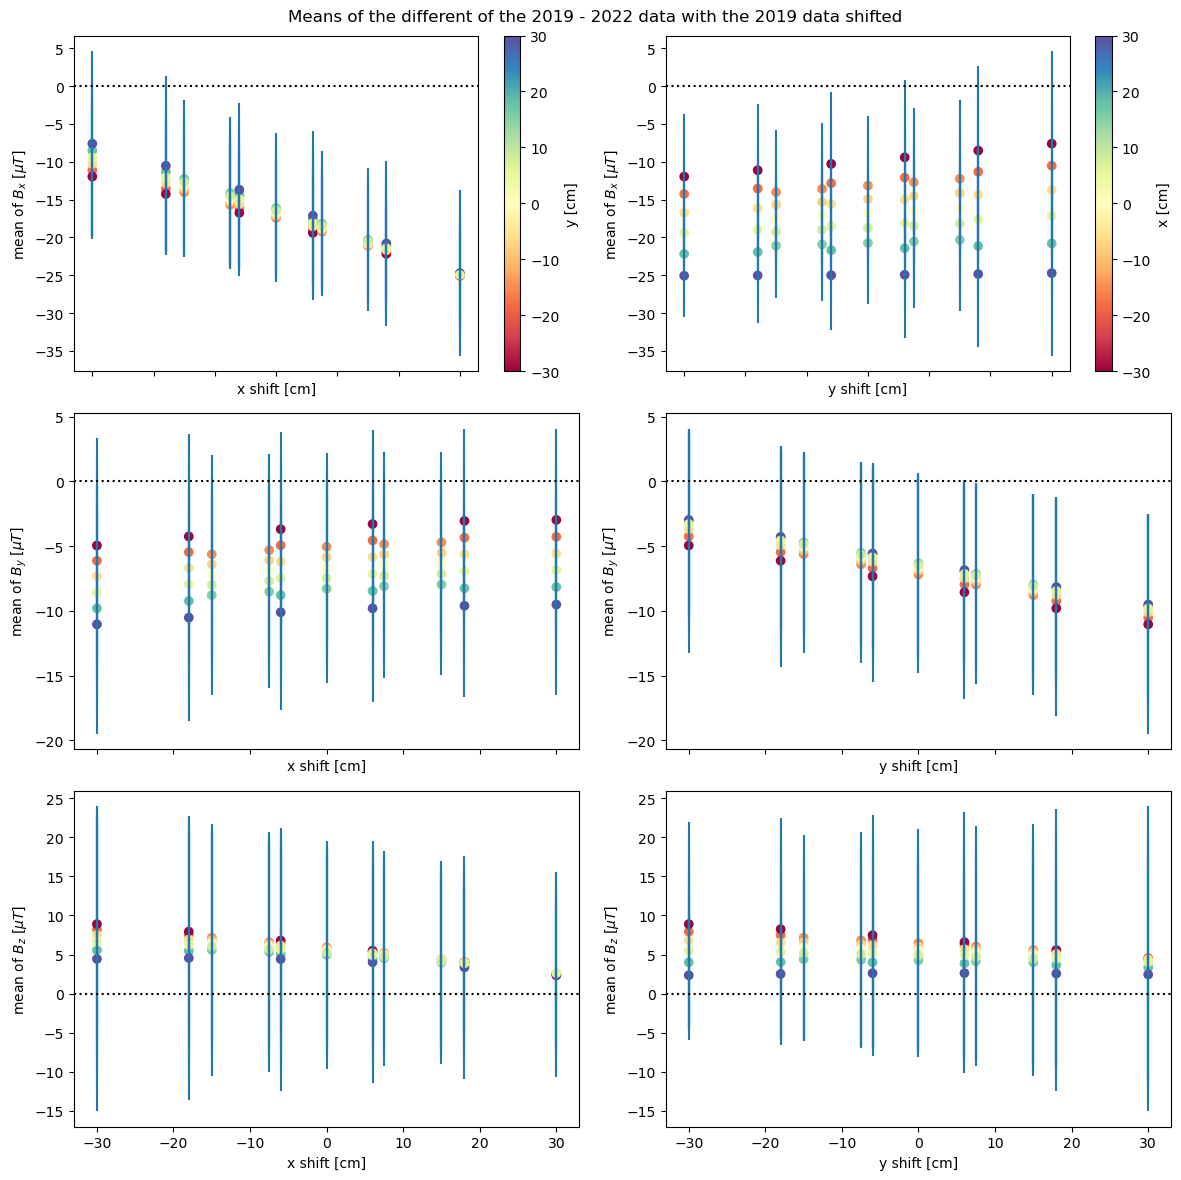

In [129]:
fig, axs = plt.subplots(3, 2, figsize=(12,12), sharex=True)
plt.suptitle("Means of the different of the 2019 - 2022 data with the 2019 data shifted")

axs = axs.flatten()

Q1 = axs[0].scatter(comparisonshifts[0], comparisonResults[0, 0, :], c=comparisonshifts[1], cmap='Spectral')
axs[0].errorbar(comparisonshifts[0], comparisonResults[0, 0, :], yerr=comparisonResults[0, 1, :], 
             ls="", marker="")
axs[0].set_xlabel('x shift [cm]')
axs[0].set_ylabel('mean of $B_x$ [$\mu T$]')
cbar_y = plt.colorbar(Q1, ax=axs[0], label='y [cm]')

Q2 = axs[1].scatter(comparisonshifts[1], comparisonResults[0, 0, :], c=comparisonshifts[0], cmap='Spectral')
axs[1].errorbar(comparisonshifts[1], comparisonResults[0, 0, :], yerr=comparisonResults[0, 1, :], 
             ls="", marker="")
axs[1].set_xlabel('y shift [cm]')
axs[1].set_ylabel('mean of $B_x$ [$\mu T$]')
cbar_x = plt.colorbar(Q2, ax=axs[1], label='x [cm]')

Q3 = axs[2].scatter(comparisonshifts[0], comparisonResults[1, 0, :], c=comparisonshifts[1], cmap='Spectral')
axs[2].errorbar(comparisonshifts[0], comparisonResults[1, 0, :], yerr=comparisonResults[1, 1, :], 
             ls="", marker="")
axs[2].set_xlabel('x shift [cm]')
axs[2].set_ylabel('mean of $B_y$ [$\mu T$]')

Q4 = axs[3].scatter(comparisonshifts[1], comparisonResults[1, 0, :], c=comparisonshifts[0], cmap='Spectral')
axs[3].errorbar(comparisonshifts[1], comparisonResults[1, 0, :], yerr=comparisonResults[1, 1, :], 
             ls="", marker="")
axs[3].set_xlabel('y shift [cm]')
axs[3].set_ylabel('mean of $B_y$ [$\mu T$]')

Q5 = axs[4].scatter(comparisonshifts[0], comparisonResults[2, 0, :], c=comparisonshifts[1], cmap='Spectral')
axs[4].errorbar(comparisonshifts[0], comparisonResults[2, 0, :], yerr=comparisonResults[2, 1, :], 
             ls="", marker="")
axs[4].set_xlabel('x shift [cm]')
axs[4].set_ylabel('mean of $B_z$ [$\mu T$]')

Q6 = axs[5].scatter(comparisonshifts[1], comparisonResults[2, 0, :], c=comparisonshifts[0], cmap='Spectral')
axs[5].errorbar(comparisonshifts[1], comparisonResults[2, 0, :], yerr=comparisonResults[2, 1, :], 
             ls="", marker="")
axs[5].set_xlabel('y shift [cm]')
axs[5].set_ylabel('mean of $B_z$ [$\mu T$]')

axs[0].axhline(0, ls=":", color="black")
axs[1].axhline(0, ls=":", color="black")
axs[2].axhline(0, ls=":", color="black")
axs[3].axhline(0, ls=":", color="black")
axs[4].axhline(0, ls=":", color="black")
axs[5].axhline(0, ls=":", color="black")

plt.tight_layout()
plt.show()

In [ ]:
# # titleS = "Difference of mapping data components \n 2019 data - 2022 data"
# titleS = "What I think the correct placement is"

# ppf.PlotComponents(df_compare_2, Compare=True, lims=None, title=titleS, Sample=None)
# # plt.savefig('plots/compare_3C.png', bbox_inches='tight')
# plt.show()